# 04.03 - HYPOTHESIS TESTING

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from progressbar import progressbar as pbar
%matplotlib inline

##Antes de 

El teorema central del límite nos dice que si tomamos una gran cantidad de muestras de una población y calculamos la media de cada muestra, esas medias seguirán una distribución normal, independientemente de la forma de la distribución original de la población. Esto es cierto siempre y cuando las muestras sean lo suficientemente grandes y las variables aleatorias sean independientes e idénticamente distribuidas.

## Stochastic models

A probabilistic (or stochastic) model is one that assigns probabilities to the different objects or events it attempts to describe. For instance, 

- The probability of a patient to have different glucose levels.
- The probability of students to obtain different scores in an exam


A stochastic model

- Just provides a probability for each object (a number between 0 and 1)
- Does not necessarily provide an explanation on **HOW** probabilities arise.
- Is given as a **probability distribution** with its corresponding PDF (**probability density function**), by which we can compute any probability



## Confidence on models

### STEP 1: Define the model you want to challenge (the NULL  Hypothesis $H_0$)

La hipotesis nula es que el modelo dado predice bien el comportamiento de la variable.

A researcher brings a stochastic model claiming that students' scores in a certain exam follow a normal distribution with $\mu=100$ and $\sigma=15$. 

Text(0, 0.5, 'probability')

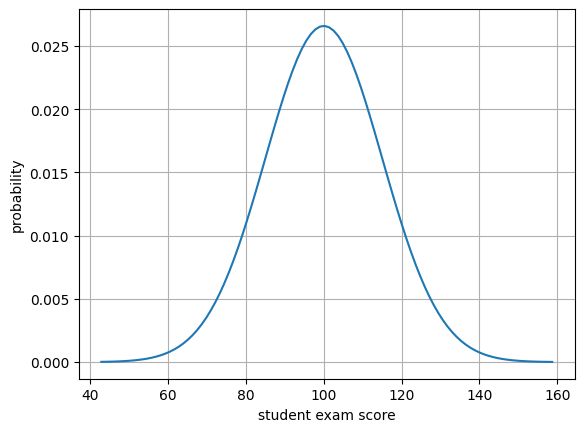

In [3]:
h0 = stats.norm(loc=100, scale=15)
x = h0.rvs(10000)
rx = np.linspace(np.min(x), np.max(x), 100)
plt.plot(rx, h0.pdf(rx))
plt.grid(); plt.xlabel("student exam score"); plt.ylabel("probability")

You are **NOT SURE** if the model works well with your students, so you start looking (**sampling**) at their exam scores. How much would you trust the model in the following cases:

- H1: You sample 5 students and their average score is 110
- H2: You sample 5 students and their average score is 105
- H3: You sample 30 students and their average score is 105

### STEP 2: Define your REAL WORLD sample and your test statistic

The test statistic is what you **are interesting** in computing from a real world sample.

- **SAMPLE**: a set of 5 students.

- **TEST STATISTIC**: the average exam score of the sample

### STEP 3: Understand the TEST STATISTIC distribution under  $H_0$ (if the model is True)


#### We will NOT USE FORMULAS, only SIMULATION

Let's assume the model is right, let's **SIMULATE** we select 5 students from the model's probability distribution. We do **10 simulations**.

Run the cells below several times, and ask yourself the following questions:

- how probable is that you see 5 students with average score 110 or higher?
- how probable is that you see 5 students with average score 105 or higher?


In [4]:
m = stats.norm(loc=100, scale=15)

In [5]:
for n in range(20):
    s = m.rvs(5)
    print ("sample %2d: "%n+ " ".join(["%5.1f"%i for i in s]), " mean: %7.2f"%np.mean(s))

sample  0: 110.7 110.3  92.6 112.0 108.4  mean:  106.82
sample  1: 109.2 100.9  99.2  80.2  85.9  mean:   95.07
sample  2:  89.5 102.8  90.9 109.4 114.3  mean:  101.39
sample  3:  66.6 128.1  97.6 116.6  97.8  mean:  101.35
sample  4:  94.4 130.1 109.3 112.1 102.3  mean:  109.65
sample  5:  75.6  85.2 105.2  99.5 100.0  mean:   93.10
sample  6: 108.4  83.2  92.0  85.2 114.7  mean:   96.69
sample  7: 125.2 121.2 129.0 107.4 105.0  mean:  117.54
sample  8: 105.8  91.0  91.4  78.4 111.9  mean:   95.71
sample  9:  99.7 111.3 104.1  77.7 110.9  mean:  100.75
sample 10: 120.7 120.4 122.6 119.3 103.0  mean:  117.21
sample 11:  91.9 110.4  74.3  99.3 101.1  mean:   95.41
sample 12: 105.3  79.3  90.0 105.3 111.0  mean:   98.18
sample 13:  91.7  73.7  86.9  83.4 103.5  mean:   87.83
sample 14:  92.2 120.0 106.7  63.8  98.5  mean:   96.23
sample 15:  87.1 119.0  78.4 102.0 107.9  mean:   98.89
sample 16: 112.4  98.0 123.2  75.7  78.9  mean:   97.64
sample 17: 103.4 103.6  89.8 107.7 103.2  mean: 

let's do the simulation **10000 times** and answer the questions

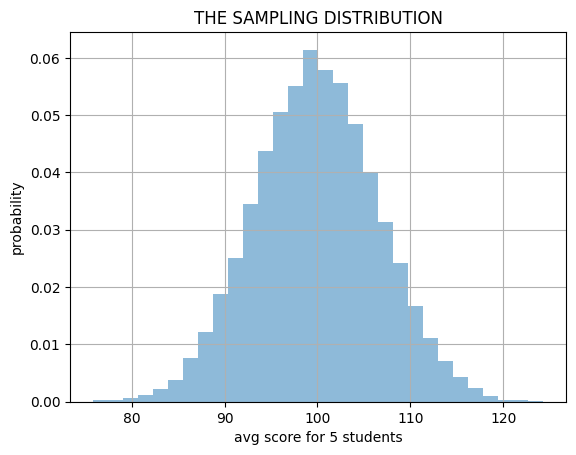

In [6]:
z = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.grid(); plt.xlabel("avg score for 5 students"); plt.ylabel("probability")
plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

### STEP 4: measure the likelihood of the REAL WORLD sample w.r.t. $H_0$

let's see and measure where our REAL WORLD sample falls in the distribution for the test statistic under $H_0$

- if our REAL WORLD sample is too rare $\rightarrow$ we have less trust in the $H_0$ model
- if our REAL WORLD sample is common $\rightarrow$ we have more trust in the $H_0$ model

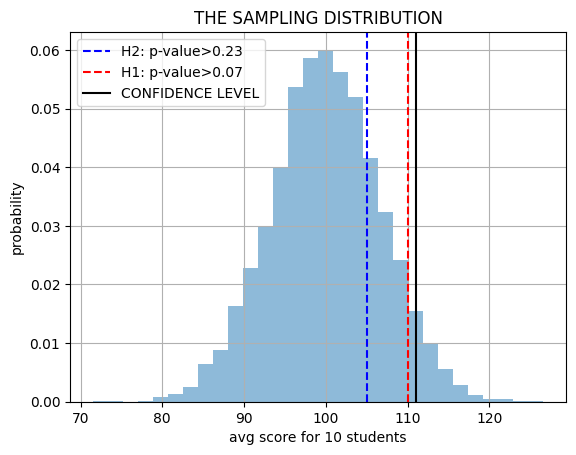

In [7]:
z = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.axvline(105, color="blue", ls="--", label="H2: p-value>%.2f"%np.mean(z>105))
plt.axvline(110, color="red", ls="--", label="H1: p-value>%.2f"%np.mean(z>110))
plt.axvline(np.percentile(z, 95), color="black", label="CONFIDENCE LEVEL")
plt.grid(); plt.xlabel("avg score for 10 students"); plt.ylabel("probability")
plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

Now, if when we took 5 students we measured an average score of 115 or 105, **would you trust this model?**

Observe that, 

- We only have **ONE REAL WORLD SAMPLE**, but we made **10000 SIMULATIONS**.
- The distribution above is called the **SAMPLING DISTRIBUTION**.
- The **p-value** is the probability of seeing something like our **REAL WORLD SAMPLE**, or even more extreme, **according to the model** we are testing.
- What we did is called a **Z-TEST**.
- It is standard to consider a **p-value<0.05** to indicate that our **REAL WORLD SAMPLE** has a very small probability **according to the model** and thus, there must be **something wrong with the model**.
- **Central Limit Theorem**: regardless the shape of the original disitrution, the sampling distribution will **always be a Normal distribution**.

**Challenge**: understand the Python code for sampling

### What if we consider H3, with 30 students?

- Another simulation, another sampling distribution.

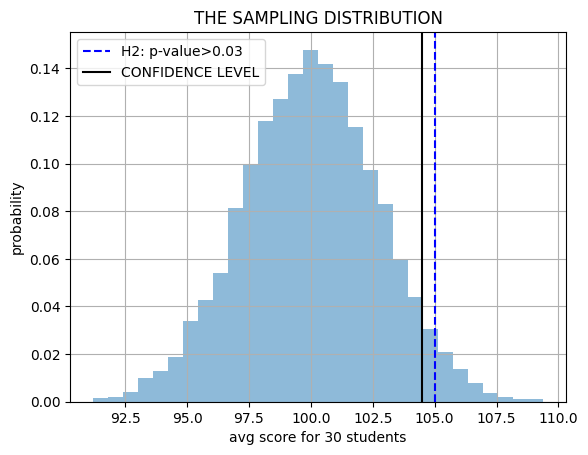

In [8]:
z = np.r_[[np.mean(m.rvs(30)) for _ in range(10000)]]

plt.hist(z, bins=30, density=True, alpha=.5);
plt.axvline(105, color="blue", ls="--",  label="H2: p-value>%.2f"%np.mean(z>105))
plt.grid(); plt.xlabel("avg score for 30 students"); plt.ylabel("probability")
plt.axvline(np.percentile(z, 95), color="black", label="CONFIDENCE LEVEL")
plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()

**WE HAVE LEST TRUST IN OUR MODEL NOW!!** $\rightarrow$ **WHY?**


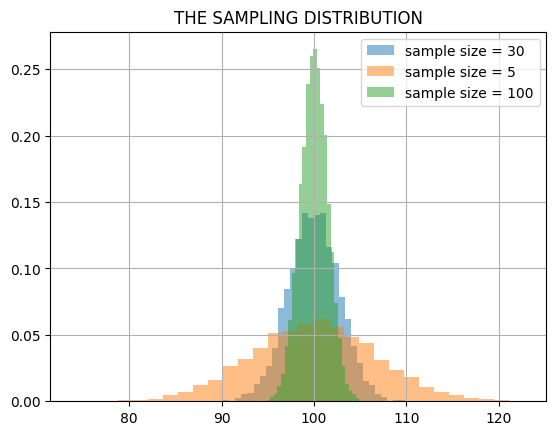

In [9]:
z1 = np.r_[[np.mean(m.rvs(30)) for _ in range(10000)]]
z2 = np.r_[[np.mean(m.rvs(5)) for _ in range(10000)]]
z3 = np.r_[[np.mean(m.rvs(100)) for _ in range(10000)]]

plt.hist(z1, bins=30, density=True, alpha=.5, label="sample size = 30");
plt.hist(z2, bins=30, density=True, alpha=.5, label="sample size = 5");
plt.hist(z3, bins=30, density=True, alpha=.5, label="sample size = 100");
plt.grid(); plt.legend(); plt.title("THE SAMPLING DISTRIBUTION"); plt.show()
plt.show();



## Terminology

- **NULL HYPOTHESIS** $H_0$: The model we are testing whether we can reject it or not.
- **REAL WORLD SAMPLE**: What we measure in reality to a limited number of objects.
- **TEST STATISTIC**: What we compute from the real world sample (the average, in our case).
- **SAMPLING DISTRIBUTION**: The distribution of simulating **many** real world examples and computing the test statistic to each of them.
- **p-value**: The probability of seeing in the simulation something as **rare** as our real world example.
- **CONFIDENCE LEVEL**: The minimum p-value we are willing to observe to NOT consider to distrust $H_0$
- **REJECT $H_0$**: When we observe a p-value lower than the confidence level, meaning that our real world sample is **too rare**.
- **FAIL TO REJECT $H_0$**: When we observe a p-value higher than the confidence level, meaning that our real world sample is **fairly normal**.
- **MONTE CARLO SIMULATION**: What we did!!!


## Simulations and Formulas

We do simulation because we have computers. When these tests were invented, computers were not around, so people developed tables and formulas to compute **by hand** the p-values.

If **simulating is hard** we can always use the analytical formula.

$$p_{value} = 1 - \mathcal{N}(0,1).\text{cdf}\Big( \frac{\bar{x}-\mu}{\sigma / \sqrt{n}} \Big) $$

Where $\mathcal{N}(0,1).\text{cdf}$ is the Cummulative Density Function of the Standard Normal distribution

In [10]:
real_world_sample_mean = 105
real_world_sample_size = 5
model_mu = 100
model_sigma = 15

In [11]:
z = np.r_[[np.mean(m.rvs(real_world_sample_size)) for _ in range(10000)]]
print ("simulated p-value %.3f"%np.mean(real_world_sample_mean<z))

simulated p-value 0.230


In [12]:
print ("analytical, p-value %.3f"%(1-stats.norm().cdf((real_world_sample_mean-model_mu)\
                                                    /(model_sigma/np.sqrt(real_world_sample_size)))))

analytical, p-value 0.228





For more info:

- Sampling distribution of the sample mean [Khan Academy](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean)

- Central limit theorem [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)